# Visualizing Spatial Distribution of Temperature Through Contour Plot

The aim of this project is to generate a data visualization using a contour plot. The dataset [`GlobalLandTemperaturesByCity.csv`](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data) will be utilized to visualize temperature variations based on latitude and longitude.

## Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import plotly.graph_objects as go

df = pd.read_csv("GlobalLandTemperaturesByCity.csv", sep=",")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


## Data cleaning

In [2]:
# Dropping columns with NaN
df.dropna(axis=0, inplace=True)

# Converting variables to float
df["Latitude"] = df["Latitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)
df["Longitude"] = df["Longitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)

# Selecting variables to plot
data = df[["AverageTemperature", "Latitude", "Longitude"]]
data.head()

,AverageTemperature,Latitude,Longitude
0,6.068,57.05,10.33
5,5.788,57.05,10.33
6,10.644,57.05,10.33
7,14.051,57.05,10.33
8,16.082,57.05,10.33


## Data preparation

In [3]:
# Preparing vectors
x = np.array(data["Longitude"])
y = np.array(data["Latitude"])
z = np.array(data["AverageTemperature"])

# Creating a matrix
arr = np.column_stack((x, y, z))

# Interpolation
xv = np.linspace(min(arr[:, 0]), max(arr[:, 0]), 20)
yv = np.linspace(min(arr[:, 1]), max(arr[:, 1]), 20)
X, Y = np.meshgrid(xv, yv)
Z = griddata((arr[:, 0], arr[:, 1]), arr[:, 2], (X, Y), method="linear")

## Data visualization

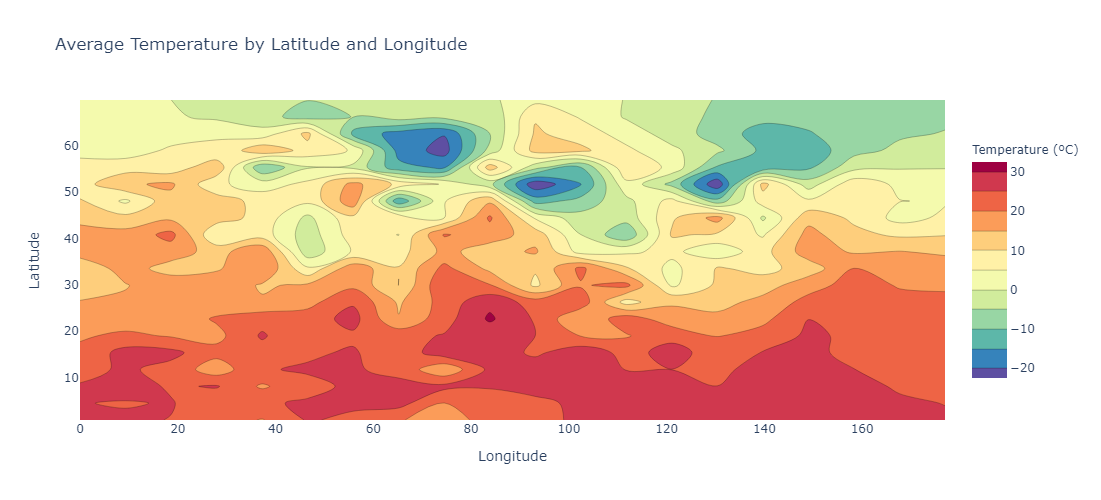

In [5]:
# Creating the figure
fig = go.Figure(data =
    go.Contour(
        z=Z,
        x=xv,
        y=yv,
        connectgaps=True,
        colorscale="spectral_r",
        line_smoothing=1,
        line_width=0.25,
        colorbar=dict(
            thickness=35,
            len=0.8,
            title="Temperature (ºC)",
            titlefont=dict(
                size=12))))

# Adding text to axes
fig.update_xaxes(title_text="Longitude")
fig.update_yaxes(title_text="Latitude")

# Adding a title, resizing, etc.
fig.update_layout(
    title="Average Temperature by Latitude and Longitude",
    autosize=False,
    width=800,
    height=500
)

fig.show()